# Tasca M9 T01

**Exercicis d'anàlisi de sentiment i textos.**

## Exercici 1
**Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.**

Para emprender esta tarea, seleccioné el emblemático discurso de Barack Obama titulado "Yes, we can". Al contemplar un futuro análisis de sentimiento del texto, consideré que la mejor opción era optar por un discurso que a mi parecer fuera esencialmente positivo. En este discurso, Obama aborda los desafíos y las aspiraciones de la nación con una perspectiva optimista.

El lema "Yes, We Can" se erige como un pilar central de su campaña, subrayando la poderosa idea de unidad y el cambio positivo que podría materializarse mediante esfuerzos colectivos. A lo largo del discurso, se pone de manifiesto la importancia de superar las divisiones políticas, destacando la necesidad de trabajar en conjunto para edificar un futuro más promisorio.

El contexto histórico de este discurso resulta fundamental, ya que encapsula un momento trascendental de transformación y esperanza en la política estadounidense. Después de este discurso, Barack Obama no solo obtuvo la nominación demócrata, sino que también hizo historia al convertirse en el primer presidente afroamericano de los Estados Unidos tras ganar las elecciones presidenciales de 2008. "Yes, We Can" perdura como un símbolo emblemático de esa campaña histórica, resonando como la promesa de un cambio que tocó los corazones de muchas personas en ese momento. Este discurso sigue siendo recordado como un faro de inspiración y unidad en la memoria colectiva de la nación.

En cuanto al trabajo técnico, procedemos a la lectura de un archivo en formato ".txt", almacenando su contenido como una cadena de caracteres en la variable 'texto'. Posteriormente, imprimimos en la pantalla el texto para examinar tanto su formato como sus características.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

with open('data/yes_we_can.txt', 'r',encoding='utf-8') as file:
    texto = file.read()

texto

'Hello, Chicago.\nIf there is anyone out there who still doubts that America is a place where all things are possible, who still wonders if the dream of our founders is alive in our time, who still questions the power of our democracy, tonight is your answer.\nIt’s the answer told by lines that stretched around schools and churches in numbers this nation has never seen, by people who waited three hours and four hours, many for the first time in their lives, because they believed that this time must be different, that their voices could be that difference.\nIt’s the answer spoken by young and old, rich and poor, Democrat and Republican, black, white, Hispanic, Asian, Native American, gay, straight, disabled and not disabled. Americans who sent a message to the world that we have never been just a collection of individuals or a collection of red states and blue states.\nWe are, and always will be, the United States of America.\nIt’s the answer that led those who’ve been told for so long 

A partir de aquí, la biblioteca 'nltk' nos brinda diversas herramientas para procesar el texto. Por ejemplo, podemos convertir cada frase del texto en objetos mediante la función 'sent_tokenize'. Esto puede resultar útil si deseamos analizar individualmente cada línea para un estudio posterior. En esta ocasión, se nos solicita determinar la frecuencia de las palabras en el texto. Para lograr esto, utilizamos la función 'word_tokenize', que fragmenta el texto palabra por palabra. Previamente a este proceso, convertimos todo el texto a minúsculas para evitar discrepancias entre palabras idénticas y una vez tokenizado imprimos en pantalla para ver el resultado.

In [10]:
texto = texto.lower()
words = word_tokenize(texto)
print(words)

['hello', ',', 'chicago', '.', 'if', 'there', 'is', 'anyone', 'out', 'there', 'who', 'still', 'doubts', 'that', 'america', 'is', 'a', 'place', 'where', 'all', 'things', 'are', 'possible', ',', 'who', 'still', 'wonders', 'if', 'the', 'dream', 'of', 'our', 'founders', 'is', 'alive', 'in', 'our', 'time', ',', 'who', 'still', 'questions', 'the', 'power', 'of', 'our', 'democracy', ',', 'tonight', 'is', 'your', 'answer', '.', 'it', '’', 's', 'the', 'answer', 'told', 'by', 'lines', 'that', 'stretched', 'around', 'schools', 'and', 'churches', 'in', 'numbers', 'this', 'nation', 'has', 'never', 'seen', ',', 'by', 'people', 'who', 'waited', 'three', 'hours', 'and', 'four', 'hours', ',', 'many', 'for', 'the', 'first', 'time', 'in', 'their', 'lives', ',', 'because', 'they', 'believed', 'that', 'this', 'time', 'must', 'be', 'different', ',', 'that', 'their', 'voices', 'could', 'be', 'that', 'difference', '.', 'it', '’', 's', 'the', 'answer', 'spoken', 'by', 'young', 'and', 'old', ',', 'rich', 'and',

limit_output extension: Maximum message size of 10000 exceeded with 14831 characters

A simple vista, observamos que esta función inicial identifica y separa las palabras según los espacios, puntuaciones y otros caracteres que las definen. La puntuación, como comas y puntos, se maneja como tokens independientes. Además, 'word_tokenize' considera correctamente caracteres unidos, como contracciones ("can't" se tokenizaría como "can't") o guiones dentro de las palabras. Ahora, exploremos los resultados de este proceso.

Palabras después de tokenizar el texto: 1909
Número de palabras únicas al tokenizar: 585

   ,  the    .  and   of   we   to    a that    ’   in  our  who this  can 
  93   82   78   73   48   46   44   39   36   31   29   25   23   20   19 


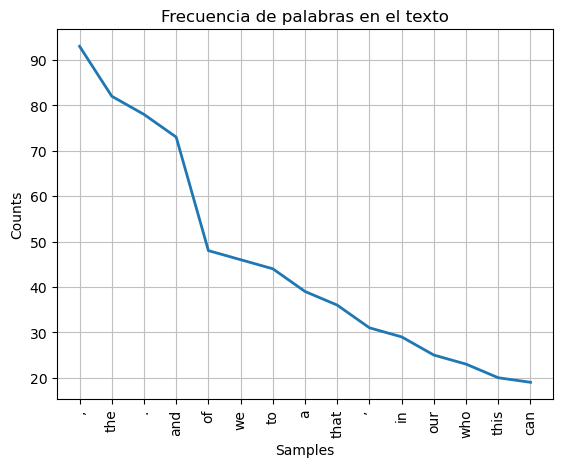

In [3]:
print("Palabras después de tokenizar el texto:",(len(words)))
dist = FreqDist(words)
print(f"Número de palabras únicas al tokenizar: {len(dist)}\n")
dist.tabulate(15)
dist.plot(15, cumulative=False, title='Frecuencia de palabras en el texto');

Vemos que la función identifica un total de 1909 palabras, de las cuales solo 585 son únicas; las restantes son repeticiones de estas mismas. Al examinar la frecuencia, notamos que en el top 10 hay 3 signos de puntuación. Por lo tanto, nuestro siguiente paso será conservar únicamente aquellas palabras que contengan caracteres alfabéticos.

Número de palabras totales: 1668
Número de palabras únicas:566

 the  and   of   we   to    a that   in  our  who this  can    s  for   it 
  82   73   48   46   44   39   36   29   25   23   20   19   18   18   17 


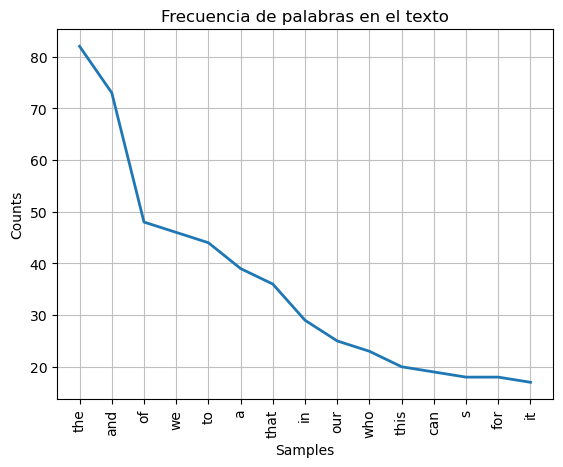

In [4]:
words = [word for word in words if word.isalpha()]
print("Número de palabras totales:",(len(words)))
dist = FreqDist(words)
print(f"Número de palabras únicas:{len(dist)}\n")
dist.tabulate(15)
dist.plot(15, cumulative=False, title='Frecuencia de palabras en el texto');

Ahora, nos enfocamos exclusivamente en lo que comúnmente consideramos palabras. Esto ha resultado en una reducción de más del 10% en el número total de palabras, mientras que la disminución en palabras únicas apenas alcanza el 3%. Esta observación indica que, aunque el número de signos de puntuación es relativamente bajo, su frecuencia de aparición es notablemente alta.

## Exercici 2
**Treu les stopwords i realitza stemming al teu conjunt de dades.**

Como observamos en los resultados del ejercicio previo, la abrumadora mayoría de las palabras presentes en el texto corresponden a preposiciones, artículos y pronombres que ofrecen escaso aporte al estudio del contenido específico del texto. Para ayudarnos a abordar este desafío, la biblioteca NLTK (Natural Language Toolkit) en Python proporciona una lista de stopwords para diversos idiomas. Esta herramienta nos permite eliminar las palabras más frecuentemente utilizadas, contribuyendo así a reducir el ruido en el análisis y focalizarnos en las palabras clave y términos más significativos.

Número de palabras después de eliminar stopwords: 734
Palabras únicas después de eliminar stopwords:477

america tonight  people     new      us    time    many     one     yes  nation  change  answer    told   world    long 
     12      12      12      10       9       7       7       7       7       6       6       5       5       5       5 


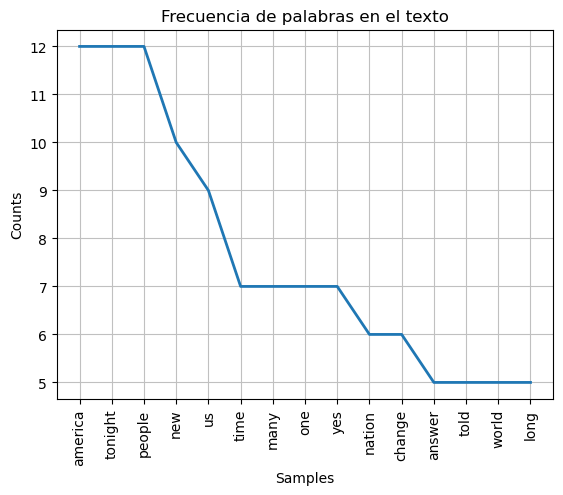

In [5]:
stopWords = set(stopwords.words("english"))
words = list(filter(lambda word: word not in stopWords, words))
print("Número de palabras después de eliminar stopwords:",(len(words)))
dist = FreqDist(words)
print(f"Palabras únicas después de eliminar stopwords:{len(dist)}\n")
dist.tabulate(15)
dist.plot(15, cumulative=False, title='Frecuencia de palabras en el texto');

Una vez más, evidenciamos la necesidad y utilidad de esta herramienta. Ha reducido el número total de palabras en más del 50%, aunque las palabras únicas apenas han disminuido un 15%. En términos absolutos, un total de 89 palabras, aparecían 934 veces. Esta depuración resalta las palabras clave del mensaje que Obama intentó transmitir en su discurso, como "America", "tonight", "people", etc. Con estas palabras, podríamos construir una frase que resuma el texto sin apartarnos del tema central.

A veces esta función no es suficiente para poder hacer un estudio profundo y detallado, pero por suerte NLTK posee otra herramienta muy poderosa como es el 'PorterStemmer'. El stemming es un proceso en el procesamiento del lenguaje natural que implica reducir las palabras a su raíz o base al eliminar afijos o sufijos. La finalidad es simplificar las palabras a su forma base, logrando que palabras similares, pero con variaciones gramaticales o derivaciones, se representen de manera uniforme. De este modo, se busca consolidar palabras relacionadas bajo una forma común, generando incluso palabras no reales,  lo que facilita el análisis y la comparación de texto.

Número de palabras únicas después de stemming:437

 america  tonight    peopl      new     time       us american   nation     mani     hope      one       ye     live    chang 
      12       12       12       10        9        9        8        7        7        7        7        7        6        6 


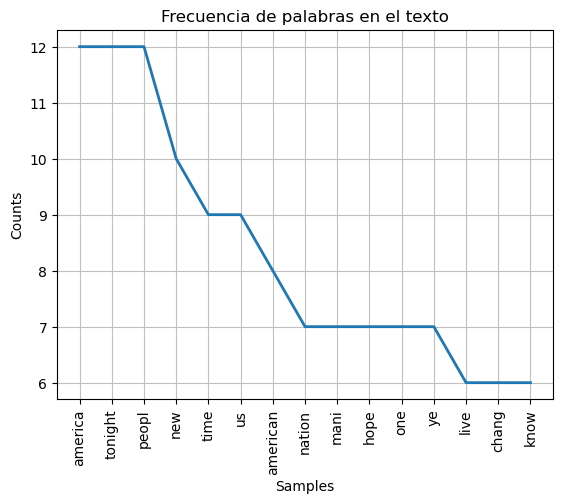

In [6]:
ps = PorterStemmer()
words = [ps.stem(word) for word in words]
dist = FreqDist(words)
print(f"Número de palabras únicas después de stemming:{len(dist)}\n")
dist.tabulate(14)
dist.plot(15, cumulative=False, title='Frecuencia de palabras en el texto');

Es importante considerar que el proceso de stemming no elimina palabras, sino que simplemente las agrupa bajo una misma raíz. De esta manera, el número total de palabras permanece constante, pero observamos una reducción en las palabras únicas, pasando de 477 a 437. Al explorar estas asociaciones, notamos la inclusión de "know", "hope" y "american" que aparece en un total de 8 ocasiones. Resulta curioso que el algoritmo no haya considerado oportuno unir dos palabras como "america" y "american", a pesar de ser claramente derivadas una de la otra. Este detalle dejaría a "america" como la palabra más utilizada en el discurso, superando con gran diferencia a la siguiente, lo cual, aunque no nos sorprende, destaca la peculiaridad del proceso.


Como complemento a este ejercicio, deseo presentar otra herramienta útil y altamente visual conocida como "wordcloud". Esta técnica de visualización destaca las palabras más frecuentes mediante el aumento de su tamaño de fuente y a menudo utiliza colores llamativos. La visualización resultante ofrece una representación rápida y clara de las palabras clave junto con sus frecuencias relativas en un cuerpo de texto.

Es importante señalar que "wordcloud" opera directamente sobre el texto original sin normalización. El algoritmo se encarga de tareas como tokenización, limpieza, eliminación de stopwords y stemming. Aunque esta herramienta es fácil de usar y beneficia considerablemente, presenta la limitación de no proporcionar control directo sobre el proceso de limpieza y preprocesamiento del texto.

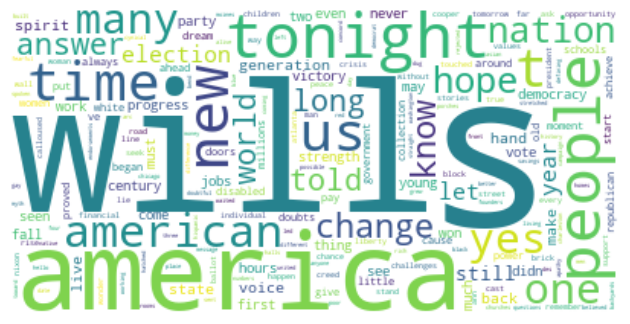

In [7]:
from wordcloud import WordCloud, ImageColorGenerator

word_cloud = WordCloud(background_color='white').generate(texto)

plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout()

# Exercici 3
**Realitza sentiment analysis al teu conjunt de dades.**

El análisis de sentimiento es una técnica de procesamiento del lenguaje natural (PLN) utilizada para discernir la actitud emocional o subjetiva expresada en un texto. Su propósito central radica en identificar y clasificar las emociones o el tono general del texto como positivo, negativo o neutro. Esta práctica resulta especialmente valiosa en el ámbito de la inteligencia artificial y la minería de opiniones, ya que posibilita comprender la opinión o actitud de las personas hacia un tema específico.

Previamente, seleccioné el discurso de Barack Obama bajo la premisa de que sería un texto positivo, ya que buscaba infundir esperanza en la población con el objetivo de fomentar la igualdad y la prosperidad. Para complementar este ejercicio, consideré interesante compararlo con un discurso de su opositor, Donald Trump. Opté por el discurso de toma de posesión como nuevo presidente de los Estados Unidos en 2017, conocido por su lema "América Primero". En este discurso, Trump abordó temas comerciales, migratorios y de seguridad nacional, resaltando la intención de enfrentar amenazas externas y proteger las fronteras estadounidenses contra lo que él percibía como un enemigo. Esta es una estrategia, recurrente y exitosa en la extrema derecha a nivel mundial, al igual que las críticas directas al establecimiento político, pintando una realidad en la cual, según su visión, la élite política se había beneficiado a expensas del pueblo.

El texto completo es el siguiente:

In [8]:
with open('data/DiscursoTrump.txt', 'r',encoding='utf-8') as file:
    texto2 = file.read()

texto2

'We, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people.\n\nTogether, we will determine the course of America and the world for many, many years to come. We will face challenges. We will confront hardships. But we will get the job done.\n\nEvery four years we gather on these steps to carry out the orderly and peaceful transfer of power.\n\nAnd we are grateful to President Obama and first lady Michelle Obama for their gracious aid throughout this transition.\n\nThey have been magnificent.\n\nThank you.\n\nToday’s ceremony, however, has a very special meaning because today we are not merely transferring power from one administration to another or from one party to another, but we are transferring power from Washington, D.C., and giving it back to you, the people.\n\nFor too long, a small group in our nation’s capital has reaped the rewards of government while the people have bore the cost. Washington flo

Observamos que es un texto que apela al miedo, la ira, el enfrentamiento y la desigualdad, utilizando un tono supremacista y paternalista al dirigirse a un supuesto público indefenso que necesita su protección. En mi perspectiva, este discurso se caracteriza por su carga negativa.

Ahora, analicemos ambos textos y examinemos lo que nos revelan los resultados.

In [9]:
sia = SentimentIntensityAnalyzer()
scores = sia.polarity_scores(texto)
df_scores = pd.DataFrame(scores, index= [1])
print(f"las puntaciones del discurso de Obama es:\n {df_scores}")
scores2 = sia.polarity_scores(texto2)
df_scores2 = pd.DataFrame(scores2, index= [2])
print(f"\nlas puntaciones del discurso de Trump es:\n {df_scores2}")

las puntaciones del discurso de Obama es:
      neg   neu    pos  compound
1  0.077  0.76  0.163    0.9995

las puntaciones del discurso de Trump es:
      neg   neu    pos  compound
2  0.073  0.71  0.217    0.9998


¡Sorpresa! El algoritmo revela que el discurso de Trump tiene una polaridad positiva casi perfecta, con un compound de 0.9998, casi alcanzando el 1 de perfección. Además, supera al famoso "Yes, we can" de Obama por unas décimas.

Esto subraya que en el ámbito político, detrás de las figuras públicas, existe un equipo multidisciplinario de lingüistas, psicólogos y comunicadores que dedican su tiempo a estudiar qué dicen y cómo lo dicen para llegar al máximo público posible. Aqui cabria hacer un pequeño inciso para diferenciar entre dos campos que aunque muy parecidos y que se nutren el uno del otro, no son exactamente lo mismo:
- **PLN (Procesamiento del Lenguaje Natural)**: Este término se usa comúnmente para describir el campo general que se ocupa de la interacción entre las computadoras y el lenguaje humano. El Procesamiento del Lenguaje Natural abarca una amplia gama de tareas, como la tokenización, el análisis sintáctico, el análisis semántico, la traducción automática y el análisis de sentimientos.

- **PNL (Programación Neurolingüística)**: Este término se utiliza en el contexto de la psicología y el desarrollo personal. La Programación Neurolingüística se centra en la conexión entre los procesos neurológicos, el lenguaje y los patrones de comportamiento que se han aprendido a través de la experiencia. Se utiliza para explorar cómo la comunicación y el lenguaje afectan la percepción y el comportamiento.

En resumen, es sumamente positivo y relevante destacar que la librería NLTK es un proyecto de código abierto que ha recibido contribuciones de desarrolladores de todo el mundo. Esta apertura y colaboración ayudan a prevenir sesgos en la creación de diccionarios, algoritmos de análisis de sentimientos y otras herramientas. Sin embargo, es importante reconocer que nuestro estudio de PLN no ha sido suficiente para superar al sólido equipo de especialistas en marketing y PNL que hay detrás de estos discursos.